# Busy times per year in SEA AirBnB

## Import libraries and read data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [27]:
df_cal = pd.read_csv('./calendar.csv')
df_lis = pd.read_csv('./listings.csv')
df_rev = pd.read_csv('./reviews.csv')

## A look at the data

In [28]:
df_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [29]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [30]:
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [31]:
no_missing_cal = df_cal.columns[df_cal.notna().all()]
no_missing_cal

Index(['listing_id', 'date', 'available'], dtype='object')

In [32]:
no_missing_lis = df_lis.columns[df_lis.notna().all()]
no_missing_lis

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [33]:
most_missing_lis = df_lis.columns[df_lis.count()<(0.25*df_lis.shape[0])]
most_missing_lis

Index(['square_feet', 'license'], dtype='object')

In [34]:
most_missing_cal = df_cal.columns[df_cal.count()<(0.5*df_cal.shape[0])]
most_missing_cal

Index([], dtype='object')

## What are the busiest times of the year to visit Seattle?

- calendar data used
- only unbooked nights have a price
- convert time to a datetime

In [35]:
df_unavailable_bnb = df_cal[df_cal["price"].isna()]
df_unavailable_bnb

,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [36]:
unique_dates = df_cal["date"].value_counts().index
unique_dates

Index(['2016-01-04', '2016-09-11', '2016-09-09', '2016-09-08', '2016-09-07',
       '2016-09-06', '2016-09-05', '2016-09-04', '2016-09-03', '2016-09-02',
       ...
       '2016-04-29', '2016-05-07', '2016-05-06', '2016-05-05', '2016-05-04',
       '2016-05-03', '2016-05-02', '2016-05-01', '2016-04-30', '2017-01-02'],
      dtype='object', length=365)

In [37]:
df_count_unavailable = df_unavailable_bnb["date"].value_counts().sort_index()
df_count_unavailable.index

Index(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
       '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12', '2016-01-13',
       ...
       '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
       '2016-12-29', '2016-12-30', '2016-12-31', '2017-01-01', '2017-01-02'],
      dtype='object', length=365)

Plotting the data

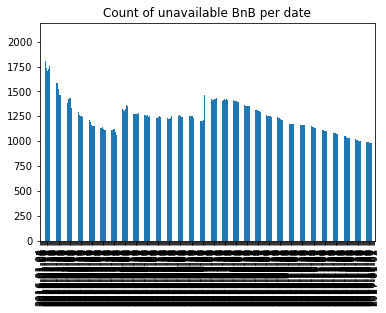

In [38]:
df_count_unavailable.plot(kind='bar', legend=None);
plt.title("Count of unavailable BnB per date");
plt.show()

Grouping the data into months as it is more interesting to see clustered data than that mess up there

In [39]:
df_count_unavailable.index =  pd.to_datetime(df_count_unavailable.index, format='%Y-%m-%d')
df_cal["date"] = pd.to_datetime(df_cal["date"], format='%Y-%m-%d')

In [40]:
df_count_unavailable.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-09', '2016-01-10', '2016-01-11',
               '2016-01-12', '2016-01-13',
               ...
               '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
               '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31',
               '2017-01-01', '2017-01-02'],
              dtype='datetime64[ns]', length=365, freq=None)

In [41]:
df_count_monthly = df_count_unavailable.groupby([(df_count_unavailable.index.year), (df_count_unavailable.index.month)]).sum()

In [54]:
type(df_count_monthly.index[0][0])

numpy.int64

In [59]:
df_count_monthly

2016  1     47665
      2     37401
      3     34420
      4     38503
      5     38387
      6     37296
      7     44136
      8     42011
      9     37294
      10    35920
      11    32760
      12    31297
2017  1      1938
Name: date, dtype: int64

In [61]:
df_count_monthly=df_count_monthly.drop(2017)

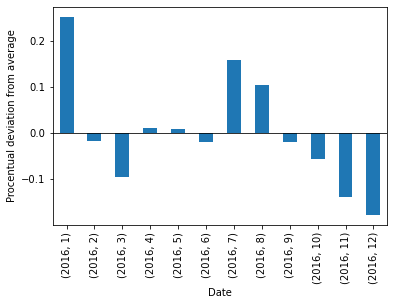

In [63]:
((df_count_monthly-df_count_monthly.mean())/df_count_monthly.mean()).plot(kind='bar', legend=None);
plt.axhline(0, color ="k", linewidth= 0.8)
plt.xlabel("Date")
plt.ylabel("Procentual deviation from average")
plt.savefig("bookedBNB_month.png")
plt.show()

Disclaimer: 
- 2017 is not fully listed -> drop 2017